<a href="https://colab.research.google.com/github/Jamesceus/Mortgage-Graph/blob/main/RecreateGraphCore2(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mortgage_df = pd.read_csv('/content/drive/MyDrive/PTDataScience/Coding Dojo/Week 3: Exploring Data with Visualizations/mortgages.csv')
mortgage_df.head(10)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
5,6,396550.67,1686.42,991.37,695.05,395855.62,30 Year,0.03
6,7,395855.62,1686.42,989.63,696.79,395158.83,30 Year,0.03
7,8,395158.83,1686.42,987.89,698.53,394460.30,30 Year,0.03
8,9,394460.30,1686.42,986.15,700.27,393760.03,30 Year,0.03
9,10,393760.03,1686.42,984.40,702.02,393058.01,30 Year,0.03


In [ ]:
# Let's first start by looking at the values contained in the Mortgage Name column. 
# Also, I encourage you to lookup what the value_counts method does using the python help function
mortgage_df[['Mortgage Name']].value_counts()

Mortgage Name
30 Year          720
15 Year          360
dtype: int64

In [ ]:
# 1. Create a filter so the Mortgage Name is '30 Year'.  Use the len() to find how many rows correspond to 30 years.
mortgage_filter = mortgage_df['Mortgage Name']=='30 Year'
#mortgage_df.len()

In [ ]:
# 2. Create a filter for an interest rate of 3% (notice how it is written in the data!).
mortgage_df['Interest Rate'].value_counts()

0.05    540
0.03    540
Name: Interest Rate, dtype: int64

In [ ]:
interestFilter = mortgage_df['Interest Rate'] == 0.03

In [ ]:
#interestFilter2 = mortgage_df['Interest Rate'] == 0.05

In [ ]:
# 3. Define a new dataframe based on both the year and the interest filters you have created.  

In [ ]:
mortgage30_03 = mortgage_df.loc[mortgage_filter & interestFilter, :]
mortgage30_05 = mortgage_df[mortgage_filter & ~interestFilter]

In [ ]:
mortgage30_03.head()
#mortgage30_05.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [ ]:
#4. We have a choice for the 5% interest rate.  We can just create another filter where df.['Interest Rate'] == .05 
#OR
#Bonus Tip: we can use the negate symbol (~) with our current filter to give us everything 
#EXCEPT what we have defined in the filter.
#This works here because we only have two interest rates (any value that is NOT 3% is 5%)

In [ ]:
mortgage30_05 = mortgage_df[mortgage_filter & ~interestFilter]
mortgage30_05.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


In [ ]:
# 4. Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum(). 
# What are the first three values in the output for the cumulative sum of the 3% rate?

In [ ]:
#1000.00 , 1998.28 ,  2994.84

In [ ]:
mortgage30_03['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

In [ ]:
#5. Use plt.plot(x, y, c=color) to plot the black line (5%).  We want the x values to be the ['Month'] and the y values to be 
#the cumulative sum of the Interest Paid.  You can use the code from the previous question to define your y values within 
#the plt.plot() function!  Hint: for black, c = 'k'

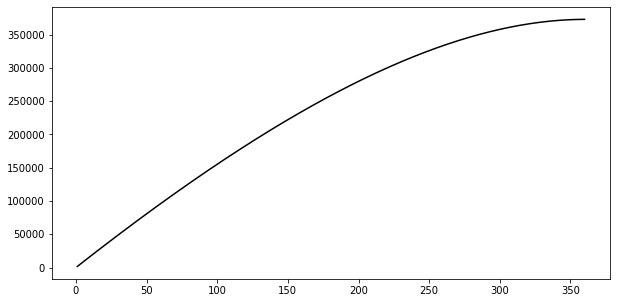

In [ ]:
fig, axes = plt.subplots(nrows= 1, ncols=1, figsize=(10, 5))
axes.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c= 'black');

In [ ]:
#6. To get both lines on the same graph, just put two plt.plot() functions one after the other in same code block and run it!

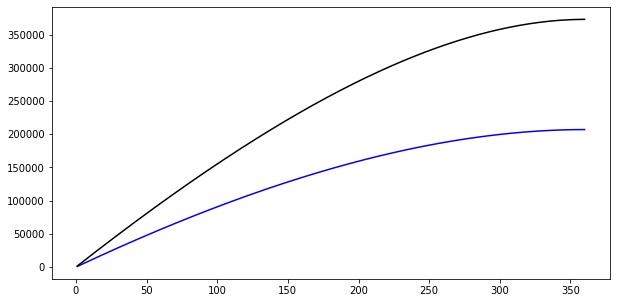

In [ ]:
fig, axes = plt.subplots(nrows= 1, ncols=1, figsize=(10, 5))
axes.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c= 'blue');
axes.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c= 'black');

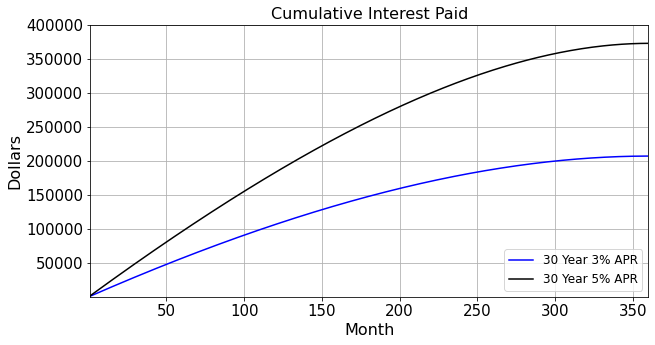

In [ ]:
fig, axes = plt.subplots(nrows= 1, ncols=1, figsize=(10, 5))
axes.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c= 'blue', label='30 Year 3% APR');
axes.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c= 'black', label='30 Year 5% APR');

#Set axis limits 
axes.set_xlim(left = 1, right = 360)
axes.set_ylim(bottom= 1, top= 400000)

#Title
axes.set_title('Cumulative Interest Paid', fontsize=16)
#Axis label
axes.set_xlabel('Month', fontsize=16)
axes.set_ylabel('Dollars', fontsize=16)
#make axis ticks bigger 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#legend
plt.legend(loc= 'lower right', fontsize = 12)
#grid;
axes.grid();

LP